In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import random
import math

In [2]:
FF_df = pd.read_csv('form_factors.csv')
TD_x_df = pd.read_csv('gpr_total_density_x_1000.csv')
TD_y_df = pd.read_csv('gpr_total_density_y_1000.csv')

In [5]:
FF_df

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,158.700313,158.640037,158.459238,158.158008,157.736499,157.194924,156.533558,155.752734,154.852847,153.834352,...,16.982286,17.058793,17.129857,17.195470,17.255628,17.310329,17.359571,17.403357,17.441690,17.474578
1,23.453699,23.425170,23.339597,23.197017,22.997497,22.741125,22.428019,22.058321,21.632197,21.149841,...,2.981943,3.011907,3.041945,3.071973,3.101912,3.131684,3.161219,3.190445,3.219298,3.247715
2,71.950184,71.915288,71.810614,71.636207,71.392140,71.078515,70.695464,70.243148,69.721756,69.131507,...,1.276403,1.347048,1.417474,1.487645,1.557526,1.627084,1.696287,1.765104,1.833502,1.901452
3,41.881901,41.858587,41.788653,41.672126,41.509050,41.299486,41.043513,40.741227,40.392744,39.998193,...,1.151976,1.174562,1.197584,1.220999,1.244763,1.268836,1.293176,1.317745,1.342507,1.367426
4,26.452318,26.419103,26.319475,26.153484,25.921215,25.622785,25.258346,24.828082,24.332212,23.770986,...,6.852551,6.795046,6.735927,6.675228,6.612986,6.549238,6.484021,6.417372,6.349330,6.279934
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
608,120.551176,120.504543,120.364663,120.131606,119.805483,119.386452,118.874713,118.270515,117.574147,116.785945,...,2.001514,2.022243,2.042219,2.061437,2.079895,2.097589,2.114517,2.130676,2.146066,2.160684
609,23.179887,23.152669,23.071029,22.935006,22.744663,22.500090,22.201403,21.848744,21.442279,20.982200,...,10.874587,10.898137,10.916890,10.930840,10.939983,10.944315,10.943840,10.938560,10.928482,10.913615
610,22.873782,22.847299,22.767861,22.635501,22.450279,22.212274,21.921590,21.578354,21.182714,20.734842,...,2.297753,2.298311,2.301421,2.307115,2.315413,2.326322,2.339834,2.355930,2.374578,2.395735
611,77.699142,77.662203,77.551407,77.366811,77.108512,76.776645,76.371382,75.892936,75.341556,74.717530,...,0.087853,0.089173,0.090459,0.091711,0.092929,0.094115,0.095271,0.096396,0.097494,0.098564


In [6]:
TD_x_df

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,-4.006749,-3.998728,-3.990706,-3.982685,-3.974663,-3.966642,-3.958620,-3.950599,-3.942577,-3.934556,...,3.934556,3.942577,3.950599,3.958620,3.966642,3.974663,3.982685,3.990706,3.998728,4.006749
1,-4.188136,-4.179751,-4.171366,-4.162982,-4.154597,-4.146212,-4.137828,-4.129443,-4.121058,-4.112674,...,4.112674,4.121058,4.129443,4.137828,4.146212,4.154597,4.162982,4.171366,4.179751,4.188136
2,-3.638160,-3.630876,-3.623593,-3.616309,-3.609026,-3.601742,-3.594458,-3.587175,-3.579891,-3.572608,...,3.572608,3.579891,3.587175,3.594458,3.601742,3.609026,3.616309,3.623593,3.630876,3.638160
3,-3.894873,-3.887075,-3.879278,-3.871480,-3.863683,-3.855885,-3.848088,-3.840290,-3.832493,-3.824695,...,3.824695,3.832493,3.840290,3.848088,3.855885,3.863683,3.871480,3.879278,3.887075,3.894873
4,-3.844019,-3.836323,-3.828627,-3.820931,-3.813236,-3.805540,-3.797844,-3.790149,-3.782453,-3.774757,...,3.774757,3.782453,3.790149,3.797844,3.805540,3.813236,3.820931,3.828627,3.836323,3.844019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
608,-4.426408,-4.417547,-4.408685,-4.399823,-4.390962,-4.382100,-4.373238,-4.364377,-4.355515,-4.346653,...,4.346653,4.355515,4.364377,4.373238,4.382100,4.390962,4.399823,4.408685,4.417547,4.426408
609,-3.773735,-3.766180,-3.758625,-3.751070,-3.743515,-3.735960,-3.728405,-3.720850,-3.713295,-3.705740,...,3.705740,3.713295,3.720850,3.728405,3.735960,3.743515,3.751070,3.758625,3.766180,3.773735
610,-4.070915,-4.062765,-4.054615,-4.046465,-4.038315,-4.030165,-4.022015,-4.013865,-4.005715,-3.997565,...,3.997565,4.005715,4.013865,4.022015,4.030165,4.038315,4.046465,4.054615,4.062765,4.070915
611,-4.221646,-4.213194,-4.204742,-4.196291,-4.187839,-4.179387,-4.170935,-4.162484,-4.154032,-4.145580,...,4.145580,4.154032,4.162484,4.170935,4.179387,4.187839,4.196291,4.204742,4.213194,4.221646


In [7]:
TD_y_df

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,333.204245,333.301271,333.384047,333.454514,333.514435,333.565400,333.608831,333.645990,333.677980,333.705757,...,333.651421,333.630976,333.606732,333.577878,333.543519,333.502666,333.454239,333.397063,333.329871,333.251301
1,334.485664,334.446752,334.400058,334.347708,334.291620,334.233505,334.174877,334.117053,334.061164,334.008162,...,333.871970,333.861751,333.845031,333.820863,333.788228,333.746028,333.693082,333.628124,333.549796,333.456646
2,340.298044,340.292436,340.284275,340.274152,340.262600,340.250091,340.237038,340.223801,340.210685,340.197949,...,340.285577,340.278487,340.265713,340.246329,340.219338,340.183673,340.138196,340.081703,340.012917,339.930496
3,334.684611,334.604473,334.531393,334.465126,334.405417,334.351998,334.304595,334.262922,334.226690,334.195602,...,334.020672,334.003043,333.983399,333.961635,333.937638,333.911290,333.882464,333.851028,333.816843,333.779761
4,332.848038,332.965807,333.067351,333.154029,333.227141,333.287923,333.337552,333.377139,333.407733,333.430322,...,333.408626,333.417165,333.423675,333.427579,333.428238,333.424946,333.416930,333.403345,333.383277,333.355737
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
608,330.493742,330.493699,330.492168,330.489515,330.486068,330.482116,330.477913,330.473680,330.469604,330.465843,...,330.466001,330.465189,330.462506,330.457542,330.449840,330.438897,330.424158,330.405018,330.380817,330.350842
609,328.922594,329.108402,329.248797,329.348917,329.413720,329.447962,329.456174,329.442638,329.411374,329.366121,...,329.317363,329.244305,329.159298,329.061218,328.948844,328.820851,328.675811,328.512185,328.328325,328.122474
610,330.865941,330.935500,330.996960,331.051203,331.099026,331.141146,331.178203,331.210762,331.239323,331.264317,...,330.649249,330.641611,330.647583,330.668481,330.705567,330.760029,330.832970,330.925391,331.038182,331.172101
611,329.636917,329.668245,329.695568,329.719203,329.739456,329.756619,329.770971,329.782778,329.792296,329.799763,...,329.802997,329.798512,329.792195,329.783804,329.773084,329.759767,329.743567,329.724185,329.701307,329.674604


In [3]:
names = []
for i in range(0,613):
    names.append(str(i) + 'x')
    names.append(str(i) + 'y')

TD_df = pd.DataFrame(index=range(1226),columns=range(0,1000))
TD_df.index = names

for i in range(0,613):
    
    x_value = []
    y_value = []
    for value in TD_x_df.loc[i]:
        x_value.append(value)
    for value in TD_y_df.loc[i]:
        y_value.append(value)
    
    TD_df.loc[str(i) + 'x'] = x_value
    TD_df.loc[str(i) + 'y'] = y_value
    
TD_df

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0x,-4.006749,-3.998728,-3.990706,-3.982685,-3.974663,-3.966642,-3.95862,-3.950599,-3.942577,-3.934556,...,3.934556,3.942577,3.950599,3.95862,3.966642,3.974663,3.982685,3.990706,3.998728,4.006749
0y,333.204245,333.301271,333.384047,333.454514,333.514435,333.5654,333.608831,333.64599,333.67798,333.705757,...,333.651421,333.630976,333.606732,333.577878,333.543519,333.502666,333.454239,333.397063,333.329871,333.251301
1x,-4.188136,-4.179751,-4.171366,-4.162982,-4.154597,-4.146212,-4.137828,-4.129443,-4.121058,-4.112674,...,4.112674,4.121058,4.129443,4.137828,4.146212,4.154597,4.162982,4.171366,4.179751,4.188136
1y,334.485664,334.446752,334.400058,334.347708,334.29162,334.233505,334.174877,334.117053,334.061164,334.008162,...,333.87197,333.861751,333.845031,333.820863,333.788228,333.746028,333.693082,333.628124,333.549796,333.456646
2x,-3.63816,-3.630876,-3.623593,-3.616309,-3.609026,-3.601742,-3.594458,-3.587175,-3.579891,-3.572608,...,3.572608,3.579891,3.587175,3.594458,3.601742,3.609026,3.616309,3.623593,3.630876,3.63816
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
610y,330.865941,330.9355,330.99696,331.051203,331.099026,331.141146,331.178203,331.210762,331.239323,331.264317,...,330.649249,330.641611,330.647583,330.668481,330.705567,330.760029,330.83297,330.925391,331.038182,331.172101
611x,-4.221646,-4.213194,-4.204742,-4.196291,-4.187839,-4.179387,-4.170935,-4.162484,-4.154032,-4.14558,...,4.14558,4.154032,4.162484,4.170935,4.179387,4.187839,4.196291,4.204742,4.213194,4.221646
611y,329.636917,329.668245,329.695568,329.719203,329.739456,329.756619,329.770971,329.782778,329.792296,329.799763,...,329.802997,329.798512,329.792195,329.783804,329.773084,329.759767,329.743567,329.724185,329.701307,329.674604
612x,-3.532301,-3.525229,-3.518157,-3.511086,-3.504014,-3.496942,-3.489871,-3.482799,-3.475727,-3.468656,...,3.468656,3.475727,3.482799,3.489871,3.496942,3.504014,3.511086,3.518157,3.525229,3.532301


In [19]:
input_data = FF_df.iloc[:-3 , :]
output_data = TD_df.iloc[:-6 , :]

In [21]:
row_index = []
for i in input_data.index:
    row_index.append(i)

train = random.sample(row_index,488)
test = []
for number in row_index:
    if not number in train:
        test.append(number)

print(train)
print(test)

[109, 472, 365, 403, 63, 363, 437, 224, 153, 435, 148, 196, 296, 539, 132, 158, 561, 312, 70, 495, 350, 589, 506, 379, 499, 381, 203, 195, 349, 317, 384, 65, 244, 18, 218, 424, 325, 82, 211, 415, 425, 515, 243, 439, 160, 407, 443, 53, 378, 135, 126, 355, 45, 504, 14, 122, 572, 149, 376, 27, 61, 62, 573, 367, 417, 558, 543, 183, 436, 393, 202, 277, 269, 303, 102, 189, 97, 271, 342, 190, 2, 602, 94, 434, 230, 597, 215, 128, 201, 197, 440, 608, 11, 10, 520, 142, 43, 329, 106, 275, 42, 98, 5, 542, 21, 133, 308, 301, 594, 575, 24, 570, 9, 231, 157, 528, 385, 223, 166, 123, 155, 274, 182, 161, 451, 449, 57, 83, 86, 345, 272, 508, 401, 564, 140, 213, 81, 574, 32, 562, 501, 324, 390, 221, 12, 411, 127, 162, 37, 172, 134, 242, 404, 358, 76, 507, 256, 119, 110, 25, 173, 85, 252, 46, 319, 339, 475, 557, 420, 139, 314, 320, 337, 147, 51, 282, 34, 146, 261, 348, 371, 366, 362, 405, 427, 229, 592, 115, 40, 174, 587, 47, 517, 59, 49, 510, 74, 482, 470, 280, 591, 462, 431, 541, 209, 374, 347, 44, 442,

In [52]:
train_input_values = []
for number in train:
    train_input_values.append(input_data.loc[number])
    
train_output_values = []
for number in train:
    list_1 = output_data.loc[str(number) + 'x']
    list_2 = output_data.loc[str(number) + 'y']
    train_output_values.append(np.concatenate((list_1,list_2)))

test_input_values = []
for number in test:
    test_input_values.append(input_data.loc[number])
    
test_output_values = []
for number in test:
    list_1 = output_data.loc[str(name) + 'x']
    list_2 = output_data.loc[str(name) + 'y']
    test_output_values.append(np.concatenate((list_1,list_2)))
    
train_input_values = np.array(train_input_values).astype(np.float32)
train_output_values = np.array(train_output_values).astype(np.float32)
test_input_values = np.array(test_input_values).astype(np.float32)
test_output_values = np.array(test_output_values).astype(np.float32)
    
#train_input_values = np.array(train_input_values).reshape(1000,488).astype(np.float32)
#train_output_values = np.array(train_output_values).reshape(2000,488).astype(np.float32)
#test_input_values = np.array(test_input_values).reshape(1000,122).astype(np.float32)
#test_output_values = np.array(test_output_values).reshape(2000,122).astype(np.float32)

In [53]:
print(train_input_values.shape)
print(train_output_values.shape)
print(test_input_values.shape)
print(test_output_values.shape)

(488, 1000)
(488, 2000)
(122, 1000)
(122, 2000)


In [69]:
#print(train_input_values)
#print(train_output_values)

inputs = keras.Input(shape=(1000,))
#dense = layers.Dense(64, activation="relu")
x = layers.Dense(2000, activation="relu")(inputs)
x = layers.Dense(1000, activation="relu")(x)
x = layers.Dense(500, activation="relu")(x)
#x = layers.Dropout(0.05, noise_shape = None, seed = 42)(x)
#x = layers.Dense(600, activation="relu")(x)
#x = layers.Dropout(0.05, noise_shape = None, seed = 42)(x)
#x = layers.Dense(400, activation="relu")(x)
#x = layers.Dropout(0.10, noise_shape = None, seed = 42)(x)
outputs = layers.Dense(2000)(x)
model = keras.Model(inputs=inputs, outputs=outputs)
model.summary()

model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(train_input_values, train_output_values, batch_size=300, epochs=200, validation_split=0.2)
#history = model.fit(train_input_values, train_output_values, batch_size=1000, epochs=1, validation_split=0.2)
#test_scores = model.evaluate(test_input_values, test_output_values, verbose=0)

Model: "model_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_19 (InputLayer)       [(None, 1000)]            0         
                                                                 
 dense_38 (Dense)            (None, 2000)              2002000   
                                                                 
 dense_39 (Dense)            (None, 1000)              2001000   
                                                                 
 dense_40 (Dense)            (None, 500)               500500    
                                                                 
 dense_41 (Dense)            (None, 2000)              1002000   
                                                                 
Total params: 5,505,500
Trainable params: 5,505,500
Non-trainable params: 0
_________________________________________________________________
Epoch 1/200
2/2 [==============================]

2/2 [==============================] - 0s 109ms/step - loss: 605.7788 - val_loss: 571.9081
Epoch 70/200
2/2 [==============================] - 0s 104ms/step - loss: 595.2196 - val_loss: 578.8338
Epoch 71/200
2/2 [==============================] - 0s 103ms/step - loss: 602.1351 - val_loss: 588.8278
Epoch 72/200
2/2 [==============================] - 0s 148ms/step - loss: 604.1725 - val_loss: 577.5576
Epoch 73/200
2/2 [==============================] - 0s 103ms/step - loss: 589.0286 - val_loss: 577.4918
Epoch 74/200
2/2 [==============================] - 0s 108ms/step - loss: 590.8666 - val_loss: 575.1820
Epoch 75/200
2/2 [==============================] - 0s 122ms/step - loss: 593.4865 - val_loss: 653.3416
Epoch 76/200
2/2 [==============================] - 0s 106ms/step - loss: 669.0728 - val_loss: 673.4447
Epoch 77/200
2/2 [==============================] - 0s 102ms/step - loss: 691.2538 - val_loss: 568.3288
Epoch 78/200
2/2 [==============================] - 0s 111ms/step - loss: 642

2/2 [==============================] - 0s 108ms/step - loss: 777.4379 - val_loss: 624.6198
Epoch 148/200
2/2 [==============================] - 0s 105ms/step - loss: 624.0248 - val_loss: 490.3891
Epoch 149/200
2/2 [==============================] - 0s 113ms/step - loss: 483.1329 - val_loss: 519.5503
Epoch 150/200
2/2 [==============================] - 0s 102ms/step - loss: 477.2788 - val_loss: 599.1713
Epoch 151/200
2/2 [==============================] - 0s 103ms/step - loss: 528.8344 - val_loss: 773.8273
Epoch 152/200
2/2 [==============================] - 0s 101ms/step - loss: 642.0710 - val_loss: 626.9830
Epoch 153/200
2/2 [==============================] - 0s 102ms/step - loss: 616.2427 - val_loss: 504.2419
Epoch 154/200
2/2 [==============================] - 0s 99ms/step - loss: 473.4592 - val_loss: 582.8732
Epoch 155/200
2/2 [==============================] - 0s 104ms/step - loss: 505.5068 - val_loss: 591.6655
Epoch 156/200
2/2 [==============================] - 0s 108ms/step - l

4/4 [==============================] - 0s 10ms/step


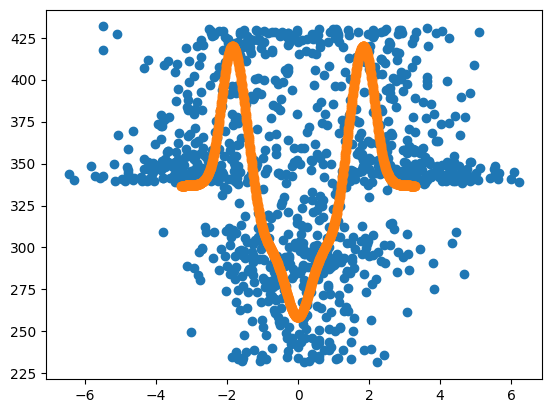

In [70]:
prediction = model.predict(test_input_values)
x_1 = prediction[0][0:1000]
y_1 = prediction[0][1000:]
plt.scatter(x_1,y_1)

x_2 = test_output_values[0][0:1000]
y_2 = test_output_values[0][1000:]
plt.scatter(x_2,y_2)
plt.show()

In [71]:
import math

prediction = model.predict(test_input_values)

index = 0
MSE = 0
for data in prediction:
    p_x = data[0:1000]
    p_y = data[1000:]
    t_x = test_output_values[index][0:1000]
    t_y = test_output_values[index][1000:]
    MSE = MSE + math.sqrt(sum((t_x-p_x)**2)+sum((t_y-p_y)**2))

MSE = MSE/len(prediction)
print(MSE)

4/4 [==============================] - 0s 9ms/step
925.5451042074817
